# Data Preprocessing And Model Building

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('../Processed_datasets/FinalDataSet_with_ph.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [3]:
sorted(df['Crop'].unique())

['apple',
 'arecanut',
 'ashgourd',
 'banana',
 'barley',
 'beetroot',
 'bittergourd',
 'blackgram',
 'blackpepper',
 'bottlegourd',
 'brinjal',
 'cabbage',
 'cardamom',
 'carrot',
 'cashewnuts',
 'cauliflower',
 'coffee',
 'coriander',
 'cotton',
 'cucumber',
 'drumstick',
 'garlic',
 'ginger',
 'grapes',
 'horsegram',
 'jackfruit',
 'jowar',
 'jute',
 'ladyfinger',
 'maize',
 'mango',
 'moong',
 'onion',
 'orange',
 'papaya',
 'pineapple',
 'pomegranate',
 'potato',
 'pumpkin',
 'radish',
 'ragi',
 'rapeseed',
 'rice',
 'ridgegourd',
 'sesamum',
 'soyabean',
 'sunflower',
 'sweetpotato',
 'tapioca',
 'tomato',
 'turmeric',
 'watermelon',
 'wheat']

In [4]:
df.isnull().sum()

Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [5]:
del df['Unnamed: 0']

In [6]:
df['Crop'].value_counts()

rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegranate  

In [7]:
df['Area_in_hectares'].max()

726300.0

In [8]:
df['Area_in_hectares'].min()

0.58

In [9]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [10]:
df['Yield_ton_per_hec'].max()

9801.0

In [11]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [58]:
set(sorted(df['State_Name']))

{'andaman_and_nicobar_islands',
 'andhra_pradesh',
 'arunachal_pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra_and_nagar_haveli',
 'goa',
 'gujarat',
 'haryana',
 'himachal_pradesh',
 'jammu_and_kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'madhya_pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil_nadu',
 'telangana',
 'tripura',
 'uttar_pradesh',
 'uttarakhand',
 'west_bengal'}

In [13]:
df['State_Name'].value_counts()

uttar pradesh                  12598
madhya pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra pradesh                  3802
west bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
kerala                          2261
haryana                         2131
uttarakhand                     1809
himachal pradesh                1425
nagaland                        1269
meghalaya                       1244
punjab                           985
jharkhand                        946
arunachal pradesh                912
jammu and kashmir                802
manipur                          679
mizoram                          530
tripura                          387
p

In [14]:
for i,j in enumerate(df['State_Name']):
    df.at[i,'State_Name']=j.replace(' ','_')

In [15]:
df['State_Name'].value_counts()

uttar_pradesh                  12598
madhya_pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil_nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra_pradesh                  3802
west_bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
kerala                          2261
haryana                         2131
uttarakhand                     1809
himachal_pradesh                1425
nagaland                        1269
meghalaya                       1244
punjab                           985
jharkhand                        946
arunachal_pradesh                912
jammu_and_kashmir                802
manipur                          679
mizoram                          530
tripura                          387
p

# Correlation heatmap


<Axes: >

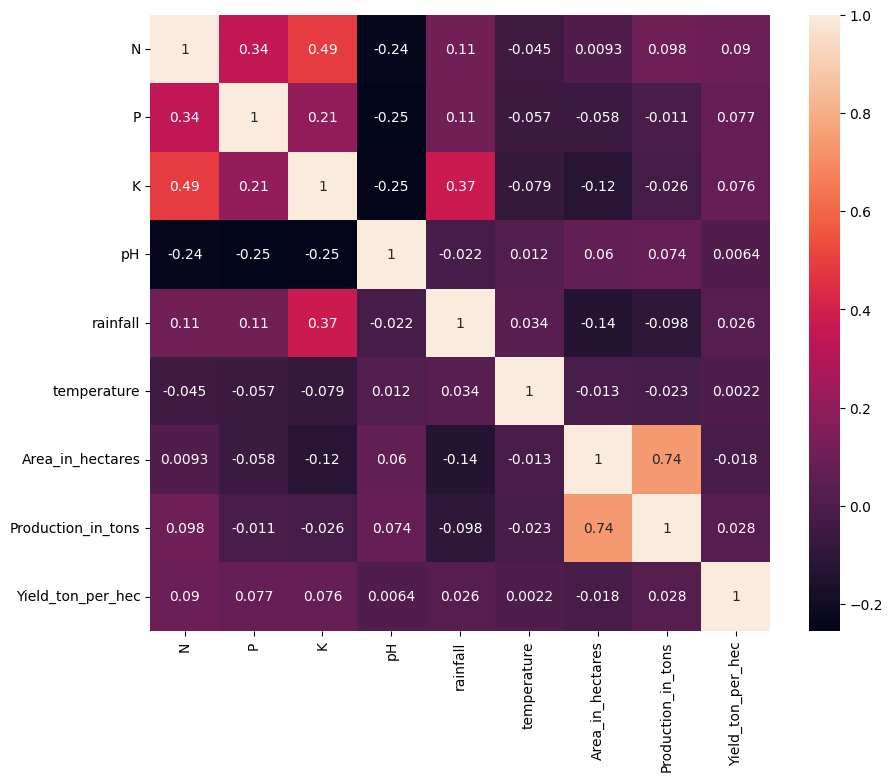

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

###### This graph shows the correlation between two columns.The range is between -1 to 1.

## Encoding Categorical Data Using OneHot Encoding

In [17]:
df_encoded=pd.get_dummies(df,columns=['State_Name','Crop','Crop_Type'])

In [18]:
df_encoded.head(20)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,State_Name_andaman_and_nicobar_islands,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,0,...,0,0,0,0,0,0,1,0,0,0
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,0,...,0,0,0,0,0,0,1,0,0,0
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,0,...,0,0,0,0,0,0,1,0,0,0
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,0,...,0,0,0,0,0,0,1,0,0,0
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,0,...,0,0,0,0,0,0,1,0,0,0
5,50,40,20,5.64,654.34,29.266667,6700.0,11800.0,1.761194,0,...,0,0,0,0,0,0,1,0,0,0
6,80,40,40,5.54,654.34,29.266667,35600.0,75400.0,2.117978,0,...,0,0,0,0,0,0,1,0,0,0
7,50,60,30,5.36,654.34,29.266667,35900.0,11100.0,0.309192,0,...,0,0,0,0,0,0,1,0,0,0
8,20,60,20,6.00,288.30,25.460000,600.0,200.0,0.333333,0,...,0,0,0,0,0,0,0,1,0,0
9,80,40,40,5.50,288.30,25.460000,18800.0,9400.0,0.500000,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N                                       99849 non-null  int64  
 1   P                                       99849 non-null  int64  
 2   K                                       99849 non-null  int64  
 3   pH                                      99849 non-null  float64
 4   rainfall                                99849 non-null  float64
 5   temperature                             99849 non-null  float64
 6   Area_in_hectares                        99849 non-null  float64
 7   Production_in_tons                      99849 non-null  float64
 8   Yield_ton_per_hec                       99849 non-null  float64
 9   State_Name_andaman_and_nicobar_islands  99849 non-null  uint8  
 10  State_Name_andhra_pradesh               99849 non-null  ui

In [22]:
df_encoded.to_csv("../encoded_data/oneHotEncoded.csv",index=False)

# Splitting the data into training and testing sets

X as features and y as target

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
del df_encoded['Yield_ton_per_hec']

In [25]:
X=df_encoded.drop('Production_in_tons',axis=1)
y=df_encoded['Production_in_tons']

In [26]:

#### feature importance ####
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

KeyboardInterrupt: 

In [34]:
model.feature_importances_

array([1.50697731e-02, 1.78505616e-03, 1.77783053e-03, 1.92860562e-02,
       5.12116339e-03, 6.23478792e-03, 6.01918701e-01, 1.19458721e-06,
       9.40910510e-03, 6.78671151e-07, 2.61368147e-04, 8.81482338e-04,
       4.19049523e-08, 3.38419620e-04, 2.32268688e-07, 7.02704468e-06,
       9.68049682e-03, 1.16009042e-02, 4.97545069e-05, 3.62154483e-05,
       1.57695071e-04, 4.65632718e-03, 1.09980293e-03, 5.00678051e-03,
       1.57766185e-03, 1.78312685e-05, 7.26499221e-05, 1.01609364e-06,
       1.20652803e-05, 8.94581778e-04, 1.76089352e-06, 6.88164466e-02,
       1.34679573e-03, 3.06536793e-06, 3.80132795e-03, 2.09079703e-03,
       7.59762132e-05, 1.03477435e-02, 1.77674988e-04, 1.67808635e-02,
       6.35370763e-14, 2.22840495e-04, 4.40393548e-10, 8.56672948e-03,
       9.05888977e-05, 3.62164995e-09, 8.60922113e-10, 2.15211737e-09,
       4.48214169e-06, 2.07299222e-10, 3.55210294e-06, 4.50923027e-06,
       2.07431504e-06, 8.93230585e-09, 3.46720350e-05, 3.19618911e-09,
      

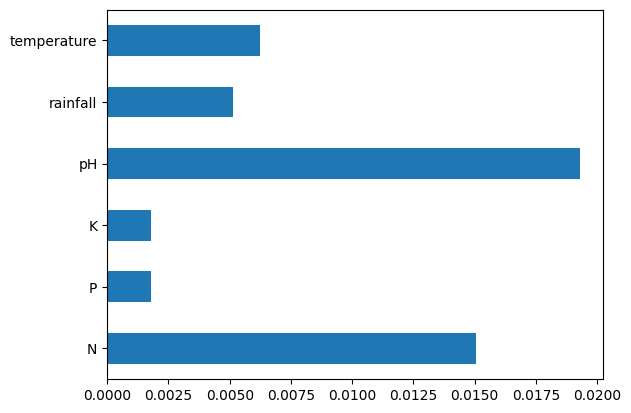

In [35]:
feat_imps=pd.Series(model.feature_importances_,index=X.columns)
feat_imps[:6].plot(kind="barh")
plt.show()

######The above graph shows the feature importance of all the features. the random splits and decision trees in Extra Trees Regressor can better capture the noise and filter out irrelevant features.Noise data refers to the random or irrelevant variation in a dataset that can cause errors or inaccuracies in predictions.

In [36]:
import pickle
with open("Models/ExtraTreesRegressor.pkl",'wb') as extra_file:
    pickle.dump(model,extra_file)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.to_csv("../encoded_data/X_train.csv",index=False)
X_test.to_csv("../encoded_data/X_test.csv",index=False)
y_train.to_csv("../encoded_data/y_train.csv",index=False)
y_test.to_csv("../encoded_data/y_test.csv",index=False)

In [30]:
from sklearn.metrics import *

# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()

### model using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
### HyperParameter Tuning ###
n_estimators=[int(i) for i in np.linspace(start=40,stop=110,num=8)]

max_features=['auto','sqrt']

max_depth=[int(i) for i in np.linspace(5,30,num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [35]:
n_estimators

[40, 50, 60, 70, 80, 90, 100, 110]

In [36]:
random_grid={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [37]:
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [38]:
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   7.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70; total time=   7.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100, 110]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
rf_best=rf_cv.best_estimator_

In [41]:
rf_best

RandomForestRegressor(max_depth=25, max_features='auto', min_samples_split=5)

In [42]:
rf_pred=rf_cv.predict(X_test)

In [43]:
rf_cv_r2=r2_score(y_test,rf_pred)

In [44]:
rf_cv_mae=mean_absolute_error(y_test,rf_pred)

In [45]:
rf_cv_mse=mean_squared_error(y_test,rf_pred)

In [46]:
rf_cv_rmse=np.sqrt(rf_cv_mse)

In [47]:
rf_cv_score=rf_best.score(X_test,y_test)

In [48]:
print(f'R2_score is : {rf_cv_r2}')
print(f'MSE is : {rf_cv_mse}')
print(f'RMSE is : {rf_cv_rmse}')
print(f'MAE is : {rf_cv_mae}')
print(f'Model Score is : {rf_cv_score}')

R2_score is : 0.9325600566935626
MSE is : 1015843686.8722897
RMSE is : 31872.302817215605
MAE is : 8184.388248763046
Model Score is : 0.9325600566935626


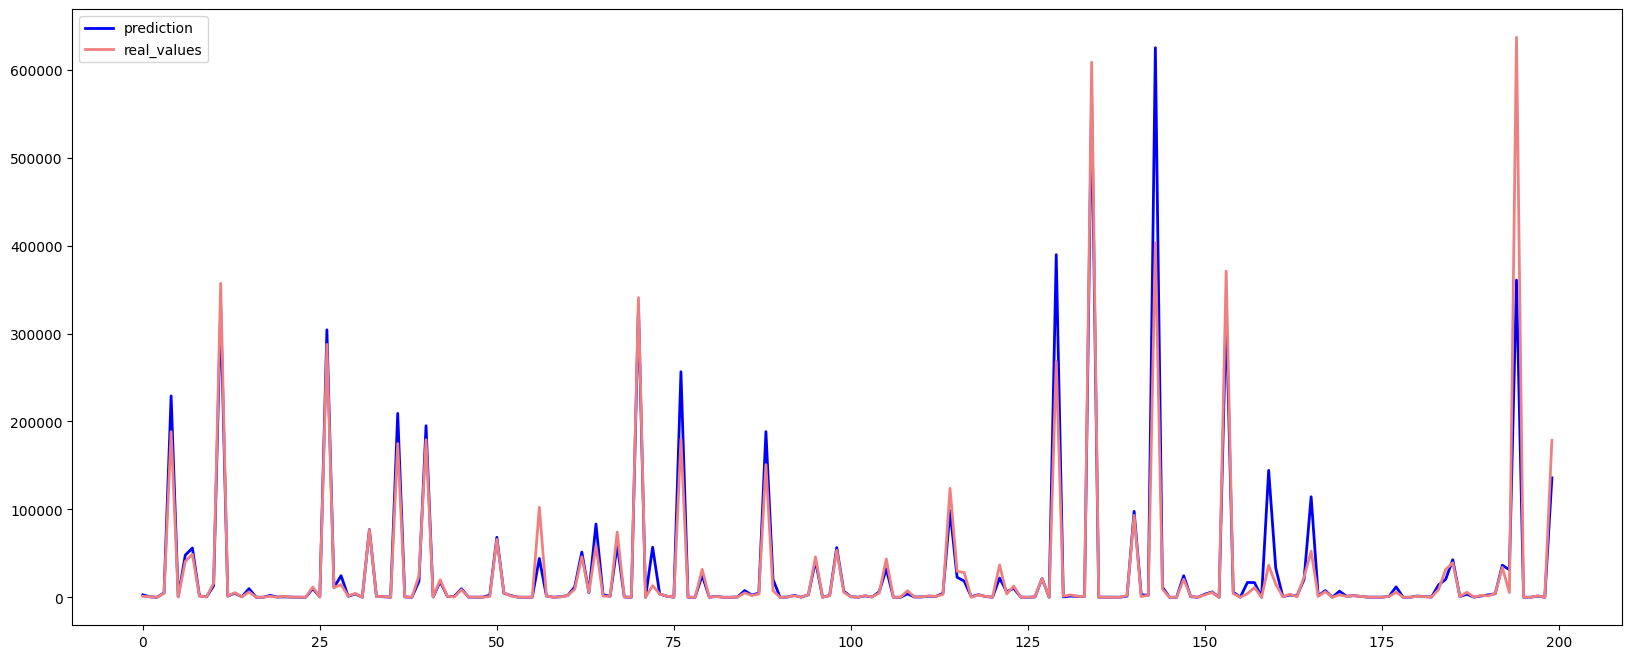

In [61]:
plt.figure(figsize=(20,8))
plt.plot(rf_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

######The above graph shows a comparison between the first 200 predicted values and actual values.

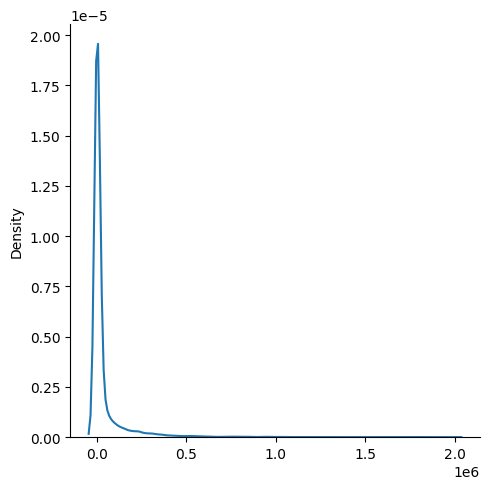

In [62]:
sns.displot(rf_pred,kind='kde')

######This a normal distribution graph of predicted values.

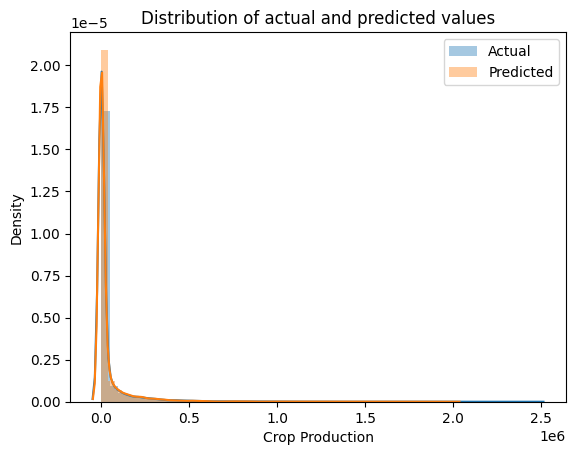

In [63]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(rf_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()


Above is the comparision of two normal distribution curves of Actual and  Predicted values. Maximum values lie near the mean of the data

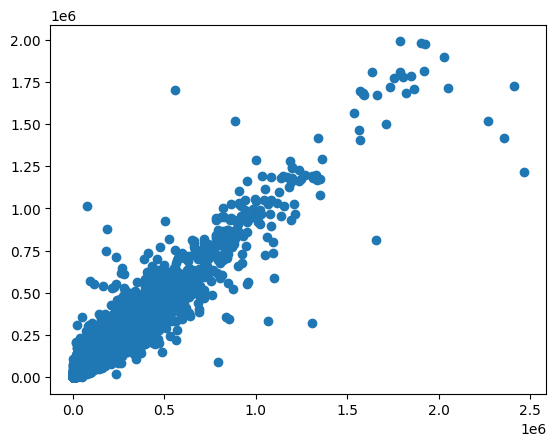

In [64]:
plt.scatter(y_test,rf_pred)

Above is a scatter plot of two components: y_test data and the predicted values of the model on X_test data.This shows a linear relation.

In [52]:
with open("../Models/RandomForest_CV_model.pkl",'wb') as rf_cv_file:
    pickle.dump(rf_best,rf_cv_file)

### model using manual parameters

In [66]:
rf_regressor=RandomForestRegressor(n_estimators=60,random_state=42)

In [67]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [68]:
y_pred=rf_regressor.predict(X_test)

In [69]:
y_pred

array([2.74230000e+03, 5.86725000e+02, 2.45966667e+01, ...,
       9.57266667e+02, 1.27644988e+05, 2.94202400e+05])

In [70]:
rf_r2=r2_score(y_test,y_pred)

In [71]:
rf_mse=mean_squared_error(y_test,y_pred)

In [72]:
rf_mae=mean_absolute_error(y_test,y_pred)

In [73]:
rf_rmse=np.sqrt(rf_mse)

In [74]:
rf_score=rf_regressor.score(X_test,y_test)

In [75]:
print(f'R2_score is : {rf_r2}')
print(f'MSE is : {rf_mse}')
print(f'RMSE is : {rf_rmse}')
print(f'MAE is : {rf_mae}')
print(f'Model Score is : {rf_score}')

R2_score is : 0.9306145253047456
MSE is : 1045149105.6203645
RMSE is : 32328.765915518095
MAE is : 8361.72783180293
Model Score is : 0.9306145253047456


### visualizing the RF predictions

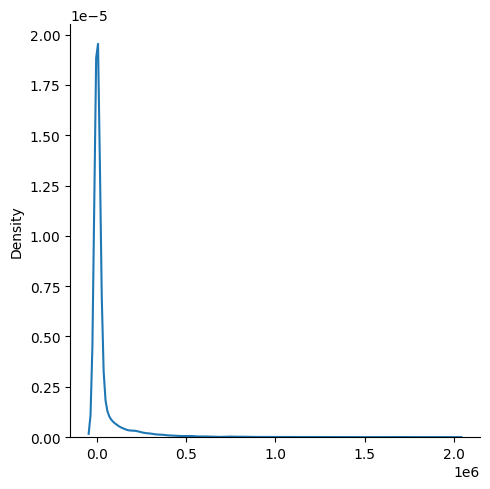

In [76]:
sns.displot(y_pred,kind='kde')

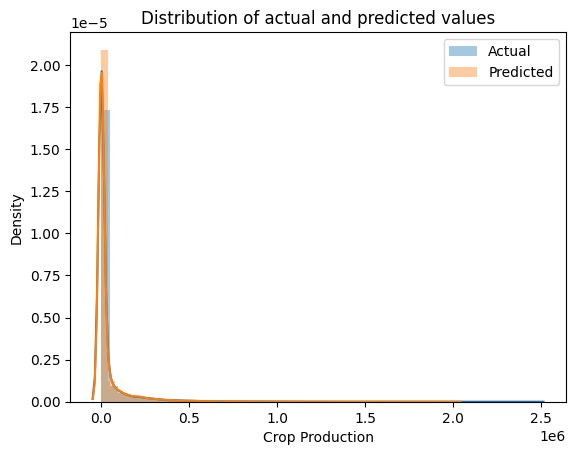

In [77]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

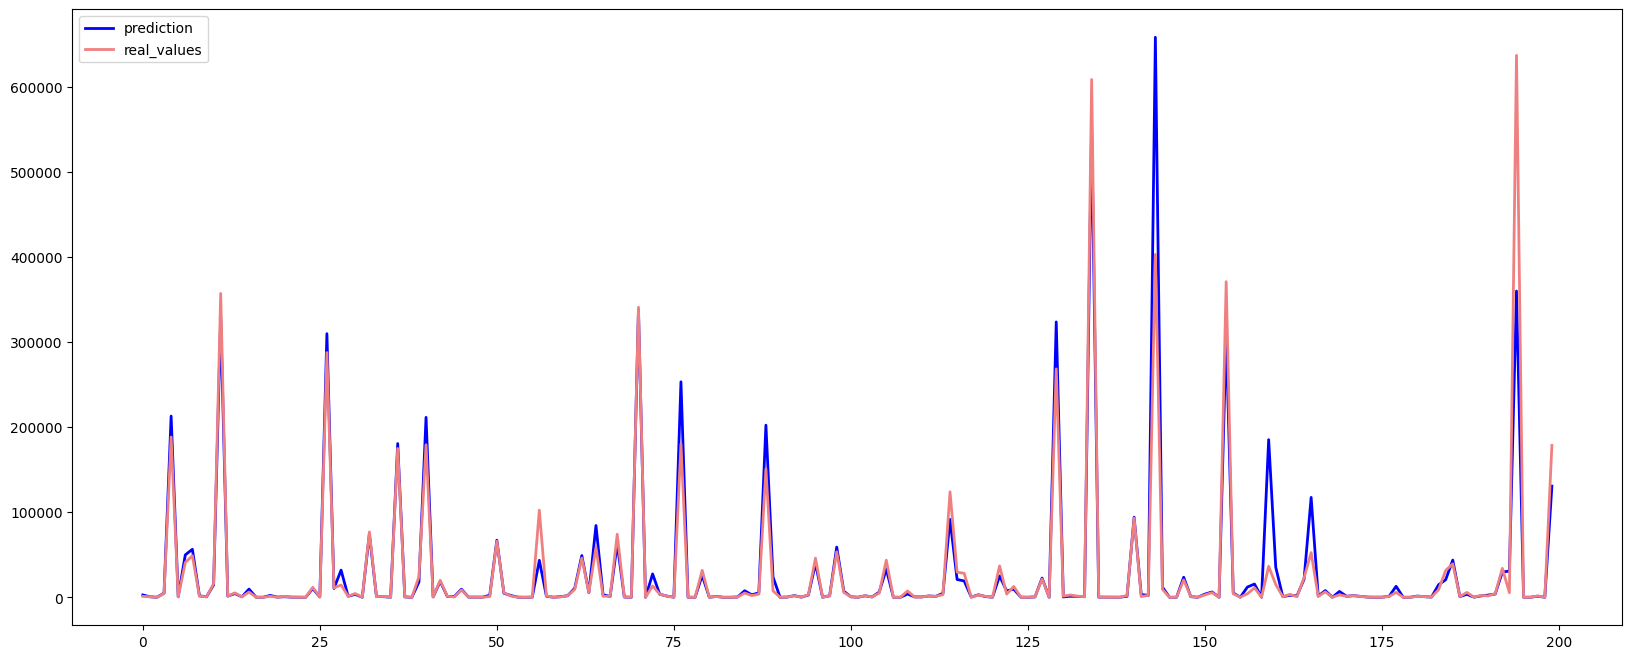

In [78]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

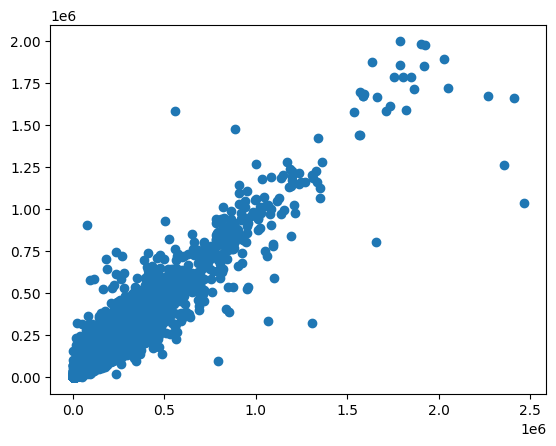

In [79]:
plt.scatter(y_test,y_pred)

In [80]:
with open('Models/RandomForest_model.pkl','wb') as rf_file:
    pickle.dump(rf_regressor,rf_file)

# Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dt_regressor=DecisionTreeRegressor()

In [83]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
dt_y_pred=dt_regressor.predict(X_test)

In [85]:
dt_y_pred

array([2.04600e+03, 6.43000e+02, 2.40000e+01, ..., 1.03700e+03,
       1.66483e+05, 3.31036e+05])

In [86]:
dt_r2=r2_score(y_test,dt_y_pred)

In [87]:
dt_mse=mean_squared_error(y_test,dt_y_pred)

In [88]:
dt_rmse=np.sqrt(mean_squared_error(y_test,dt_y_pred))

In [89]:
dt_mae=mean_absolute_error(y_test,dt_y_pred)

In [90]:
dt_score=dt_regressor.score(X_test,y_test)

In [91]:
print(f'R2_score is : {dt_r2}')
print(f'MSE is : {dt_mse}')
print(f'RMSE is : {dt_rmse}')
print(f'MAE is : {dt_mae}')
print(f'Model Score is : {dt_score}')

R2_score is : 0.8966655939014003
MSE is : 1556519755.5843718
RMSE is : 39452.753460111904
MAE is : 10616.735428142214
Model Score is : 0.8966655939014003


### Visualizing Descision Tree Predictions

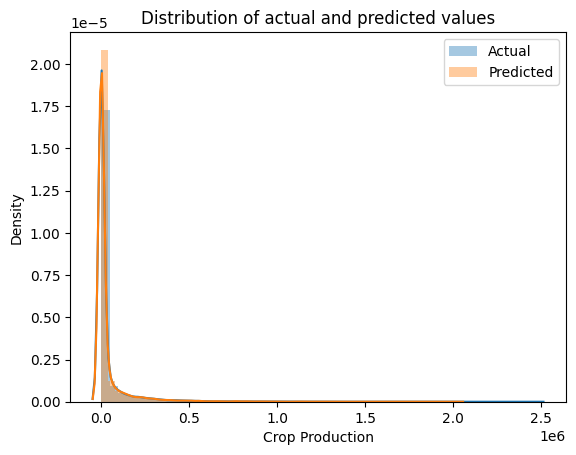

In [92]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(dt_y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

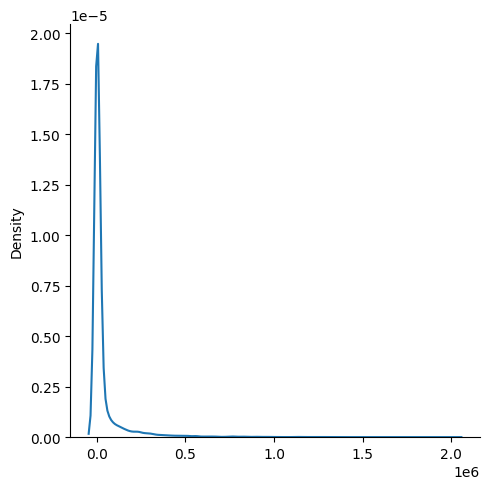

In [93]:
sns.displot(dt_y_pred,kind='kde')

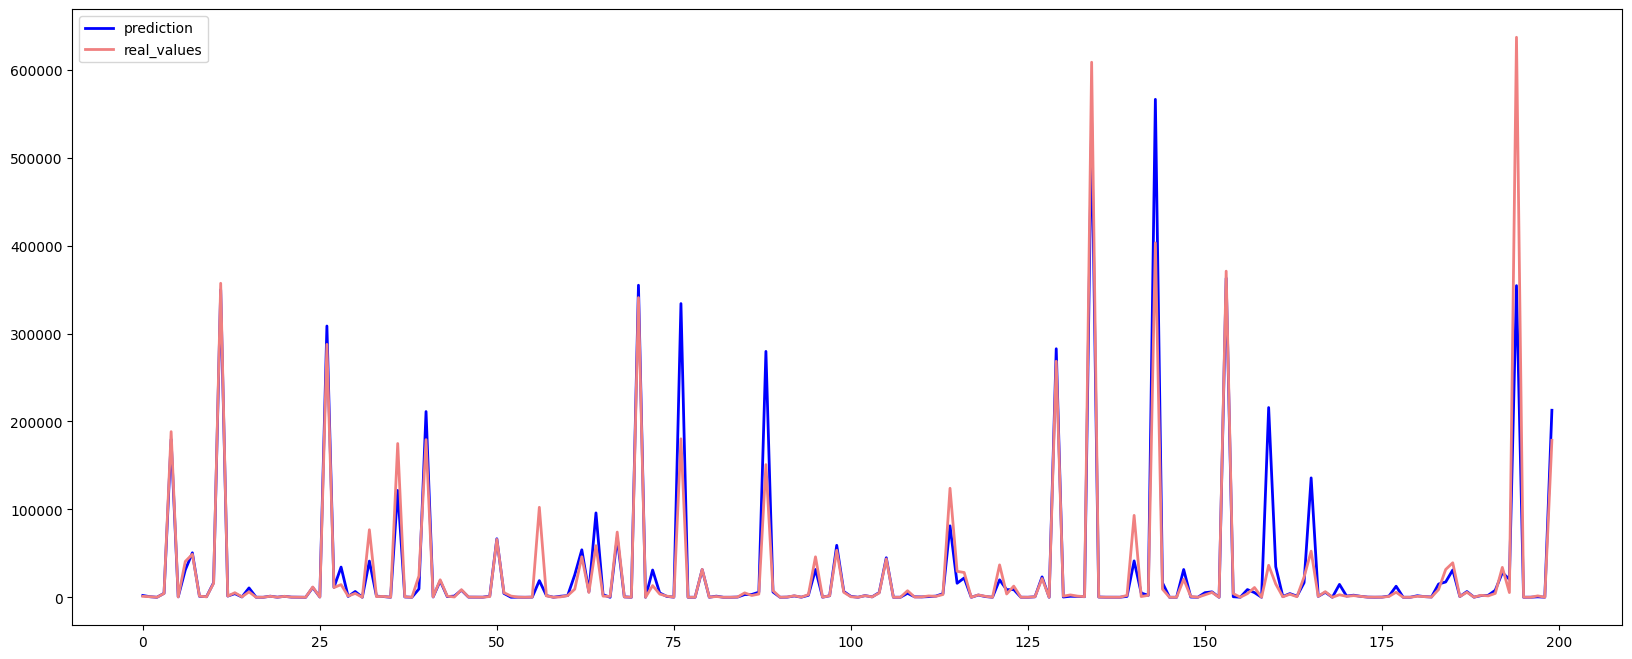

In [94]:
plt.figure(figsize=(20,8))
plt.plot(dt_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

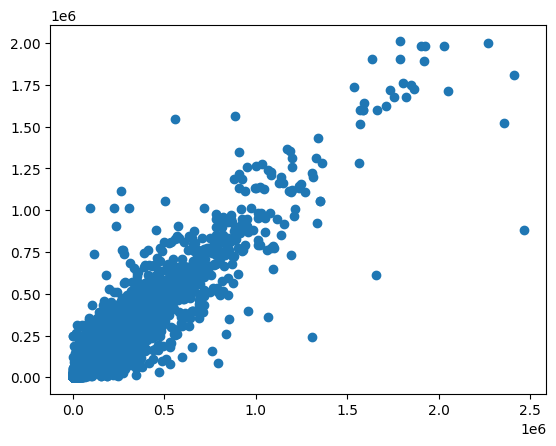

In [95]:
plt.scatter(y_test,dt_y_pred)

In [96]:
with open('Models/DecisionTreeRegressor_model.pkl','wb') as dt_file:
    pickle.dump(dt_regressor,dt_file)

# XG Boost Regressor

In [80]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


### XG Boost without hypertuning

In [97]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [98]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [99]:
xgb.score(X_test,y_test)

0.9342483181921699

In [100]:
xgb_y_pred=xgb.predict(X_test)

In [101]:
xgb_y_pred

array([  5391.554  ,   1521.2361 ,    628.79865, ...,    463.91064,
       132568.89   , 328679.2    ], dtype=float32)

In [102]:
xgb_r2=r2_score(y_test,xgb_y_pred)

In [103]:
xgb_mae=mean_absolute_error(y_test,xgb_y_pred)

In [104]:
xgb_mse=mean_squared_error(y_test,xgb_y_pred)

In [105]:
xgb_rmse=np.sqrt(xgb_mse)

In [106]:
xgb_score=xgb.score(X_test,y_test)

In [107]:
print(f'R2_score is : {xgb_r2}')
print(f'MSE is : {xgb_mse}')
print(f'RMSE is : {xgb_rmse}')
print(f'MAE is : {xgb_mae}')
print(f'Model Score is : {xgb_score}')

R2_score is : 0.9342483181921699
MSE is : 990413508.5378114
RMSE is : 31470.835841105512
MAE is : 8874.89672244528
Model Score is : 0.9342483181921699


In [108]:
with open("Models/XGBoost_Regressor_model.pkl",'wb') as xgb_file:
    pickle.dump(xgb,xgb_file)

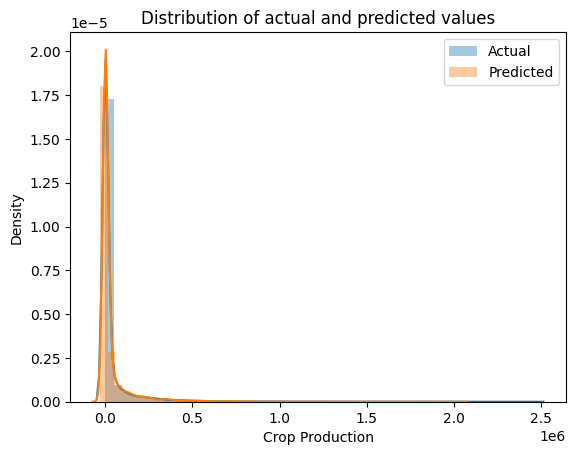

In [109]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(xgb_y_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

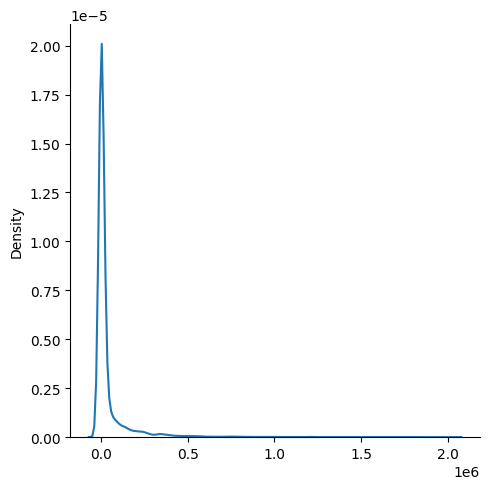

In [110]:
sns.displot(xgb_y_pred,kind='kde')

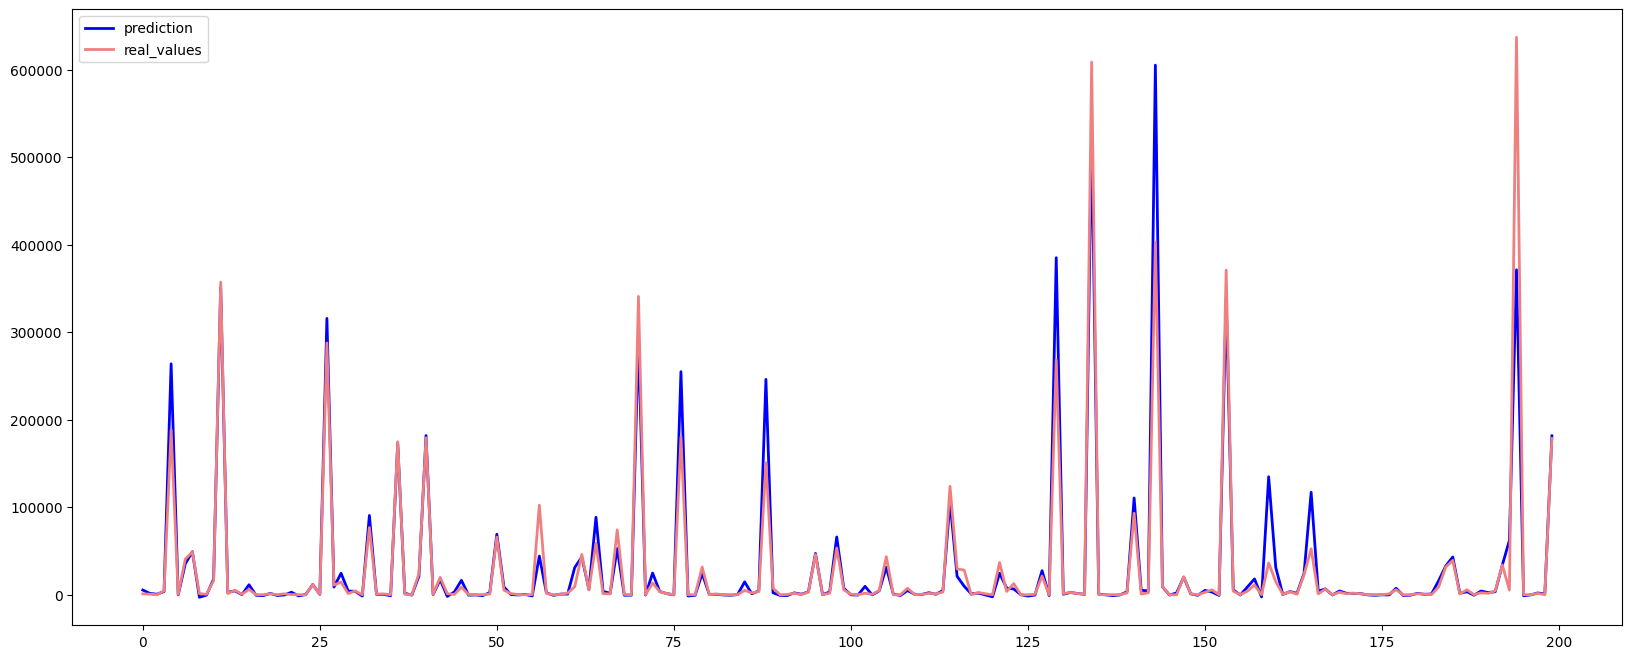

In [111]:
plt.figure(figsize=(20,8))
plt.plot(xgb_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

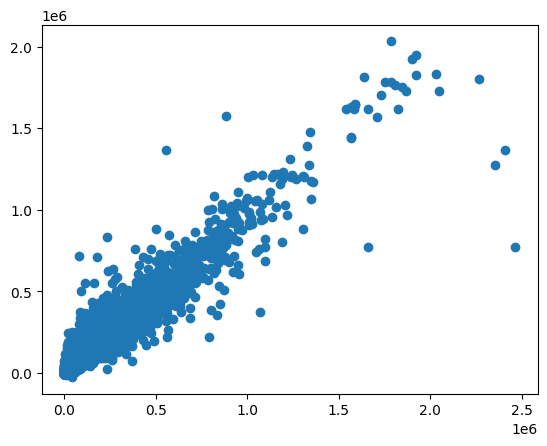

In [112]:
plt.scatter(y_test,xgb_y_pred)

### XG Boost with Randomized Search CV

In [113]:
from scipy.stats import randint,uniform
xgb_random=XGBRegressor()

In [114]:
param_grid={
    'max_depth': range(4,10),
    'learning_rate': np.logspace(-3, 0, 50),
    'subsample': np.linspace(0.5, 1, 50),
    'n_estimators': range(40, 100, 10)
}

In [115]:
xgb_cv=RandomizedSearchCV(estimator=xgb_random,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,n_jobs=-1,random_state=42)

In [116]:
xgb_cv.fit(X_train,y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:118746.76568
[1]	validation_0-rmse:109499.86948
[2]	validation_0-rmse:101389.37469
[3]	validation_0-rmse:94093.72778
[4]	validation_0-rmse:87264.20817
[5]	validation_0-rmse:81186.71517
[6]	validation_0-rmse:75793.56207
[7]	validation_0-rmse:70708.09505
[8]	validation_0-rmse:66241.77968
[9]	validation_0-rmse:62310.63850
[10]	validation_0-rmse:58776.98497
[11]	validation_0-rmse:55636.85994
[12]	validation_0-rmse:52886.64794
[13]	validation_0-rmse:50232.93768
[14]	validation_0-rmse:48083.53366
[15]	validation_0-rmse:46039.68411
[16]	validation_0-rmse:44414.19716
[17]	validation_0-rmse:42769.05600
[18]	validation_0-rmse:41571.69366
[19]	validation_0-rmse:40312.96278
[20]	validation_0-rmse:39261.95151
[21]	validation_0-rmse:38360.82139
[22]	validation_0-rmse:37698.43344
[23]	validation_0-rmse:36974.58360
[24]	validation_0-rmse:36338.72691
[25]	validation_0-rmse:35924.23828
[26]	validation_0-rmse:35454.41955
[27]	validation_0-rmse:35141.25826
[28]	validation_0-rmse:3473

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.70408163, 0.71428571, 0.7244898 , 0.73469388, 0.74489796,
       0.75510204, 0.76530612, 0.7755102 , 0.78571429, 0.79591837,
       0.80612245, 0.81632653, 0.82653061, 0.83673469, 0.84693878,
       0.85714286, 0.86734694, 0.87755102, 0.8877551 , 0.89795918,
       0.90816327, 0.91836735, 0.92857143, 0.93877551, 0.94897959,
       0.95918367, 0.96938776, 0.97959184, 0.98979592, 1.        ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [117]:
xgb_cv_pred=xgb_cv.predict(X_test)

In [118]:
xgb_cv_pred

array([2.0175801e+04, 5.8678479e+02, 1.1689361e+02, ..., 9.1713000e+02,
       1.4456467e+05, 3.0916581e+05], dtype=float32)

In [119]:
xgb_best=xgb_cv.best_estimator_

In [120]:
xgb_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09102981779915217,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [121]:
xgb_cv.best_params_

{'subsample': 0.5,
 'n_estimators': 50,
 'max_depth': 9,
 'learning_rate': 0.09102981779915217}

In [122]:
xgb_cv_r2=r2_score(y_test,xgb_cv_pred)

In [123]:
xgb_cv_mae=mean_absolute_error(y_test,xgb_cv_pred)

In [124]:
xgb_cv_mse=mean_squared_error(y_test,xgb_cv_pred)

In [125]:
xgb_cv_rmse=np.sqrt(xgb_cv_mse)

In [126]:
xgb_cv_score=xgb_best.score(X_test,y_test)

In [127]:
print(f'R2_score is : {xgb_cv_r2}')
print(f'MSE is : {xgb_cv_mse}')
print(f'RMSE is : {xgb_cv_rmse}')
print(f'MAE is : {xgb_cv_mae}')
print(f'Model Score is : {xgb_cv_score}')

R2_score is : 0.9310805853141654
MSE is : 1038128872.5795177
RMSE is : 32220.00733363538
MAE is : 8942.008521071722
Model Score is : 0.9310805853141654


In [128]:
with open("Models/XGBoost_CV_model.pkl",'wb') as xgb_cv_file:
    pickle.dump(xgb_best,xgb_cv_file)

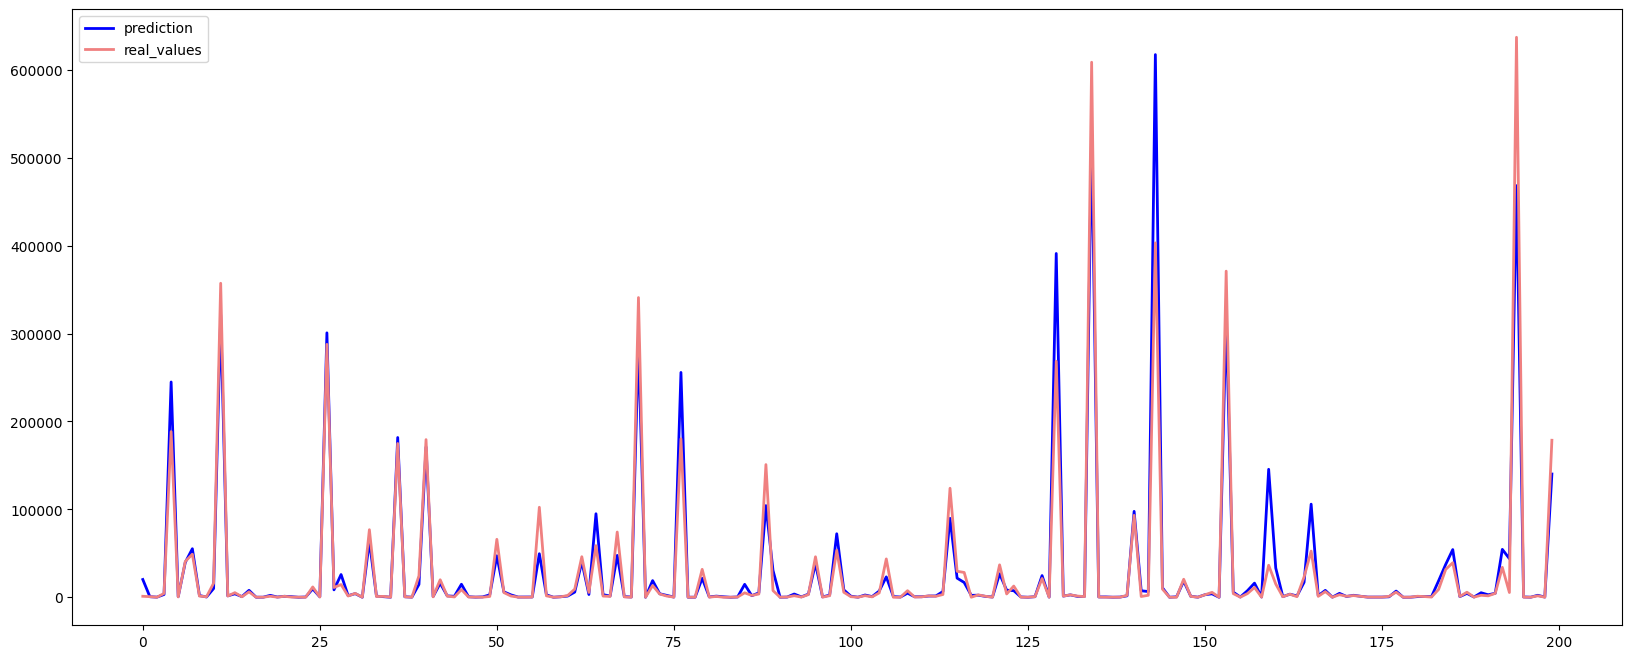

In [129]:
plt.figure(figsize=(20,8))
plt.plot(xgb_cv_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

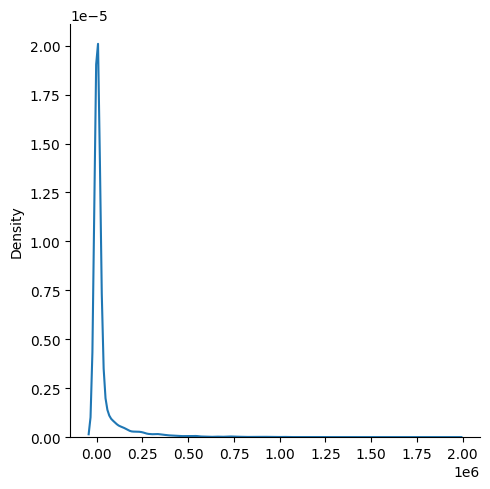

In [130]:
sns.displot(xgb_cv_pred,kind='kde')

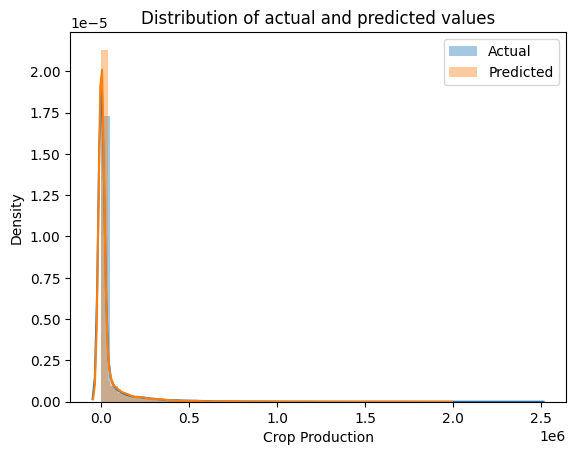

In [131]:
sns.distplot(y_test, label='Actual',kde=True)
sns.distplot(xgb_cv_pred, label='Predicted',kde=True)
plt.legend()
plt.xlabel('Crop Production')
plt.ylabel('Density')
plt.title('Distribution of actual and predicted values')
plt.show()

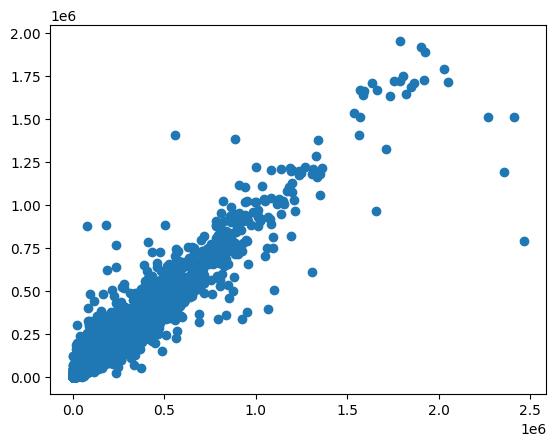

In [132]:
plt.scatter(y_test,xgb_cv_pred)

###### As above models come up with trees, they do not require scaling the data

### Scaling the data for other models

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [134]:
X_train.sample()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
65408,80,40,20,5.34,976.06,25.666667,2350.61,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
X_train.iloc[:,[0,1,2,3,4,5,6]]=scaler.fit_transform(X_train.iloc[:,[0,1,2,3,4,5,6]])

In [136]:
X_train.sample(5)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
27817,0.512013,-1.438106,2.740238,-0.958281,0.678749,0.403317,-0.376040,0,0,0,...,1,0,0,0,0,0,0,0,0,1
46849,-1.006268,-1.771186,-0.421933,2.019320,-0.666285,0.593089,-0.335170,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50288,0.512013,-1.438106,2.740238,-1.275892,0.988693,-0.036773,-0.356190,0,0,0,...,1,0,0,0,0,0,0,0,0,1
68968,-1.259315,-0.105785,-0.773285,-0.243657,-0.994636,-0.231855,-0.290907,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34159,0.258966,-0.105785,-0.070581,-0.481865,-0.828953,-1.114927,-0.356213,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
X_test.iloc[:,[0,1,2,3,4,5,6]]=scaler.transform(X_test.iloc[:,[0,1,2,3,4,5,6]])

In [138]:
X_test.sample(5)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,State_Name_andaman_and_nicobar_islands,State_Name_andhra_pradesh,State_Name_arunachal_pradesh,...,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_summer,Crop_Type_whole year
45790,0.258966,-0.105785,-0.070581,-0.640670,-0.478150,1.659911,2.029981,0,0,0,...,0,0,0,0,0,0,1,0,0,0
90414,0.258966,-0.105785,-0.070581,-0.442163,-0.315345,1.379604,0.020811,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15910,1.271154,-0.105785,-0.773285,0.073954,-0.315345,1.379604,-0.083073,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79042,-1.259315,-0.105785,-0.773285,-0.481865,0.230603,1.422993,-0.373129,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23540,-0.500174,-0.105785,-0.773285,-1.037684,-1.033664,-0.830625,-0.326987,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
X_train.to_csv("encoded_data/scaled_X_train.csv",index=True)
X_test.to_csv("encoded_data/scaled_X_test.csv",index=True)

# Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [141]:
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
lr_y_pred=lr.predict(X_test)

In [143]:
lr_y_pred

array([  6992.,  13760.,   7152., ...,  16016., 198224., 276848.])

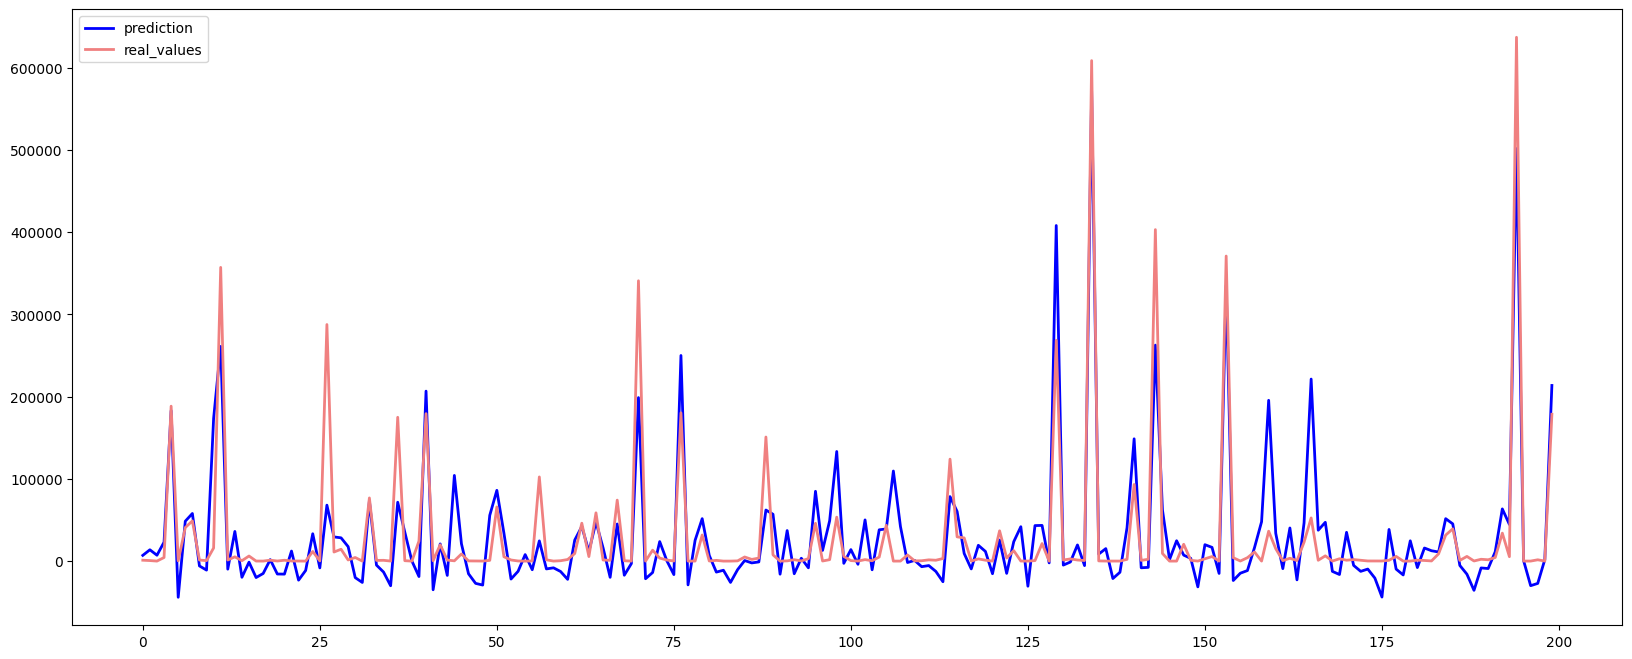

In [144]:
plt.figure(figsize=(20,8))
plt.plot(lr_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

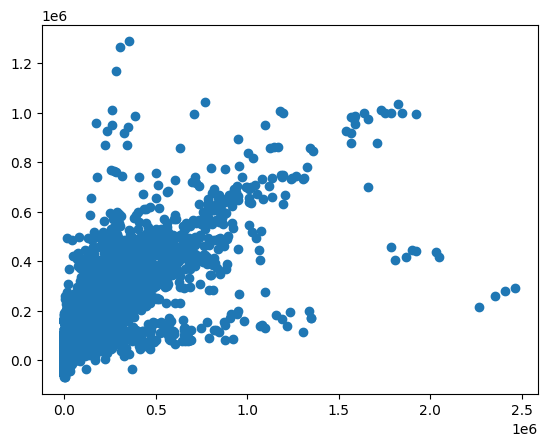

In [145]:
plt.scatter(y_test,lr_y_pred)

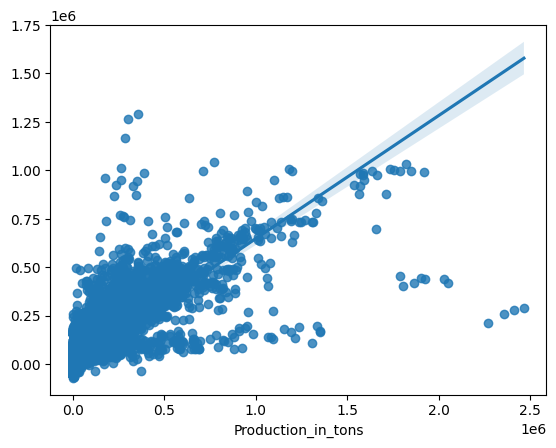

In [146]:
sns.regplot(x=y_test,y=lr_y_pred)
plt.show()

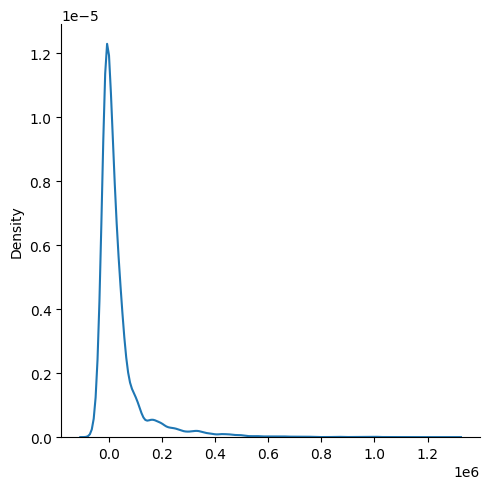

In [147]:
sns.displot(lr_y_pred,kind='kde')

In [148]:
lr_mae=mean_absolute_error(y_test,lr_y_pred)

In [149]:
lr_mse=mean_squared_error(y_test,lr_y_pred)

In [150]:
lr_rmse=np.sqrt(lr_mse)

In [151]:
lr_r2=r2_score(y_test,lr_y_pred)

In [152]:
lr_score=lr.score(X_test,y_test)

In [153]:
lr_score

0.6485105805308499

In [154]:
print(f'R2_score is : {lr_r2}')
print(f'MSE is : {lr_mse}')
print(f'RMSE is : {lr_rmse}')
print(f'MAE is : {lr_mae}')
print(f'Model Score is : {lr_score}')

R2_score is : 0.6485105805308499
MSE is : 5294463344.189371
RMSE is : 72763.06304842705
MAE is : 31490.690796194292
Model Score is : 0.6485105805308499


In [155]:
with open("Models/LinearRegression_model.pkl",'wb') as lr_file:
    pickle.dump(lr,lr_file)

# K Neighbors Regressor

In [156]:
from sklearn.neighbors import KNeighborsRegressor

In [157]:
knn=KNeighborsRegressor(n_neighbors=20)

In [158]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [159]:
knn_y_pred=knn.predict(X_test)

In [160]:
knn_r2=r2_score(y_test,knn_y_pred)

In [161]:
knn_mse=mean_squared_error(y_test,knn_y_pred)

In [162]:
knn_rmse=np.sqrt(knn_mse)

In [163]:
knn_mae=mean_absolute_error(y_test,knn_y_pred)

In [164]:
knn_score=knn.score(X_test,y_test)

In [165]:
print(f'R2_score is : {knn_r2}')
print(f'MSE is : {knn_mse}')
print(f'RMSE is : {knn_rmse}')
print(f'MAE is : {knn_mae}')
print(f'Model Score is : {knn_score}')

R2_score is : 0.913586120899966
MSE is : 1301646905.9447665
RMSE is : 36078.344002251084
MAE is : 10293.557409747955
Model Score is : 0.913586120899966


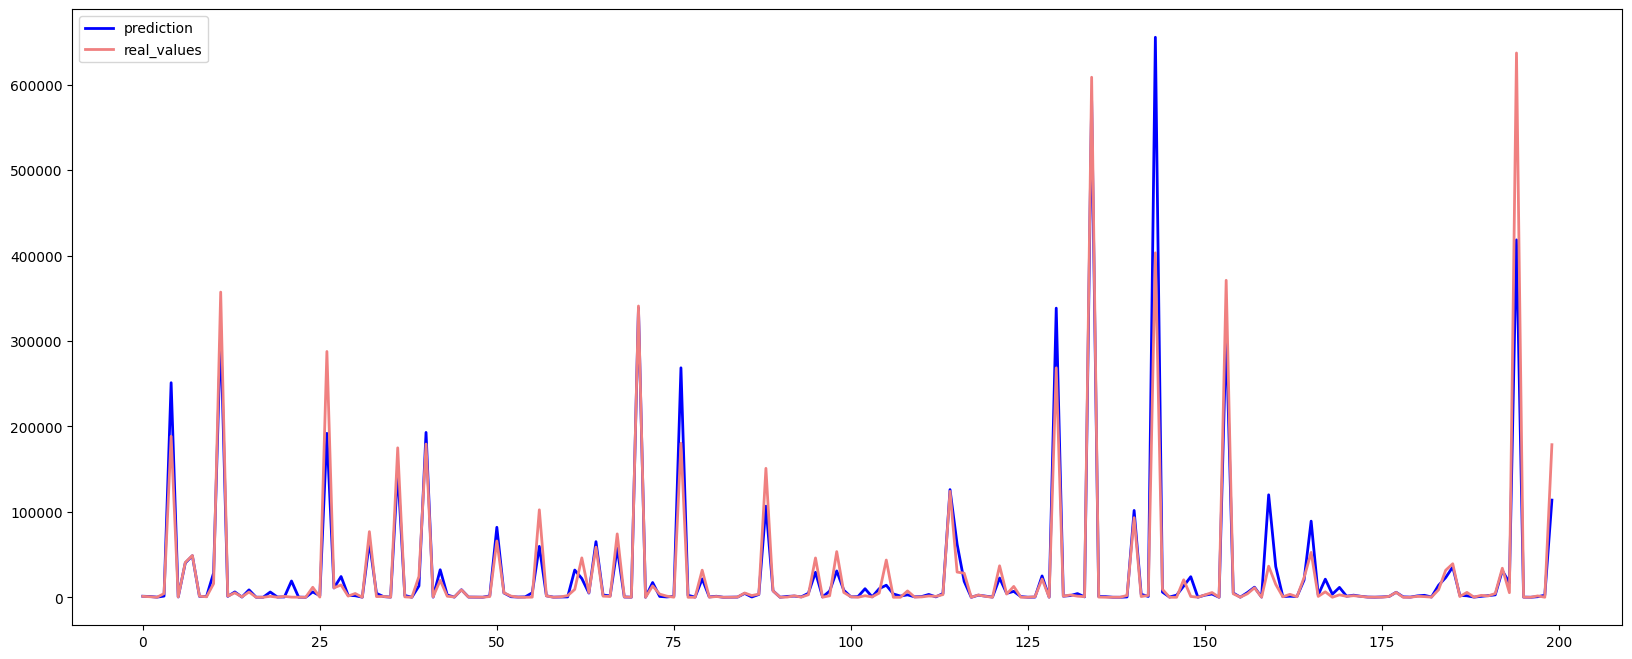

In [166]:
plt.figure(figsize=(20,8))
plt.plot(knn_y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

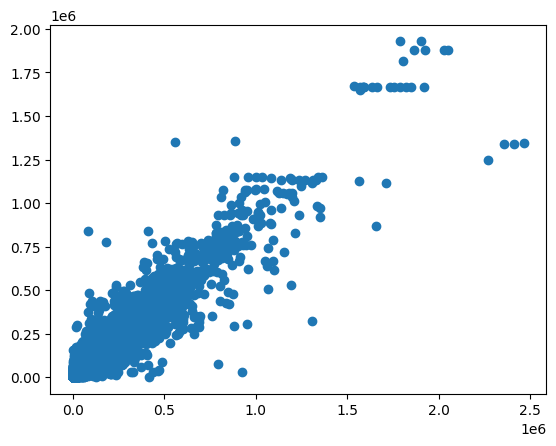

In [167]:
plt.scatter(y_test,knn_y_pred)

In [168]:
with open("Models/KNeighbouresRegressor_model.pkl",'wb') as knn_file:
    pickle.dump(knn,knn_file)

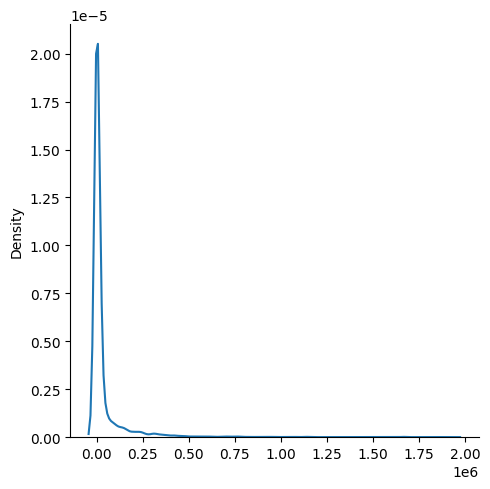

In [169]:
sns.displot(knn_y_pred,kind='kde')

### KNN Hyperparameter Tuning

In [170]:
knn_random=KNeighborsRegressor()

In [171]:
knn_grid={'n_neighbors':np.random.randint(5,30,20)}

In [172]:
knn_cv=RandomizedSearchCV(estimator=knn_random,param_distributions=knn_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,n_jobs=-1,random_state=42)

In [173]:
knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5, 13,  9,  5, 29, 24, 27, 18, 26,  5, 17, 23, 26,  5, 13, 13, 15,
       22,  6,  5])},
                   random_state=42, scoring='neg_mean_squared_error')

In [174]:
knn_cv_pred=knn_cv.predict(X_test)

In [175]:
knn_best=knn_cv.best_estimator_

In [176]:
knn_best

KNeighborsRegressor(n_neighbors=6)

In [177]:
knn_cv_r2=r2_score(y_test,knn_cv_pred)

In [178]:
knn_cv_mse=mean_squared_error(y_test,knn_cv_pred)

In [179]:
knn_cv_rmse=np.sqrt(knn_cv_mse)

In [180]:
knn_cv_mae=mean_absolute_error(y_test,knn_cv_pred)

In [181]:
knn_cv_score=knn_best.score(X_test,y_test)

In [182]:
print(f'R2_score is : {knn_cv_r2}')
print(f'MSE is : {knn_cv_mse}')
print(f'RMSE is : {knn_cv_rmse}')
print(f'MAE is : {knn_cv_mae}')
print(f'Model Score is : {knn_cv_score}')

R2_score is : 0.9340622433346162
MSE is : 993216342.5863632
RMSE is : 31515.33503845966
MAE is : 9001.022013631557
Model Score is : 0.9340622433346162


In [183]:
with open('Models/KNeighbouresRegressorCV_model.pkl','wb') as knn_cv_file:
    pickle.dump(knn_best,knn_cv_file)

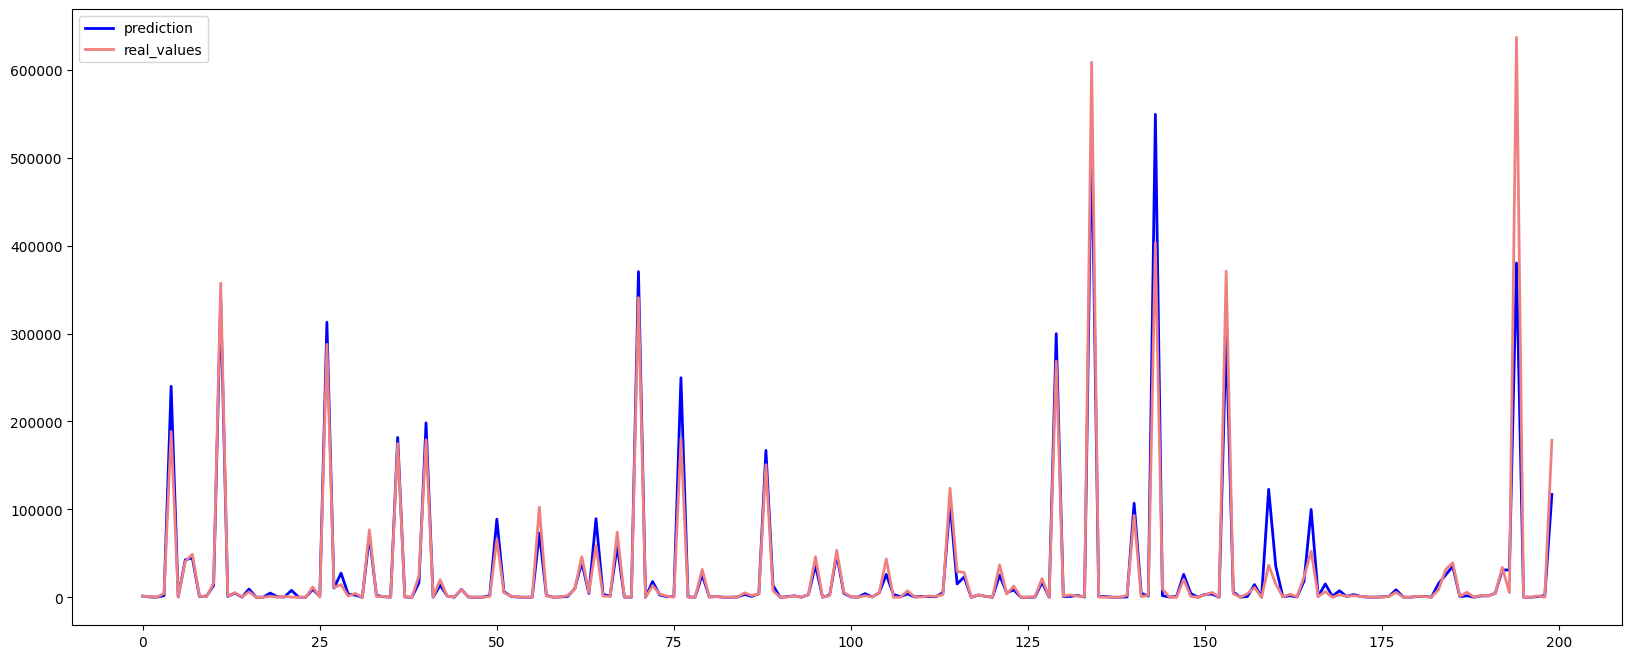

In [184]:
plt.figure(figsize=(20,8))
plt.plot(knn_cv_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

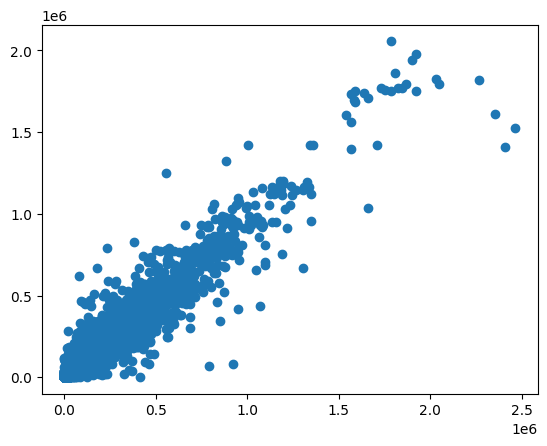

In [185]:
plt.scatter(y_test,knn_cv_pred)

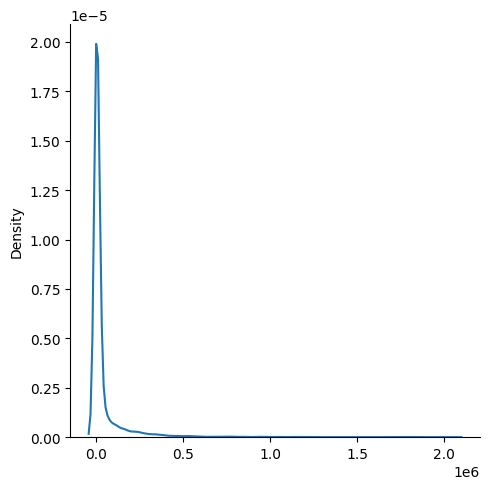

In [186]:
sns.displot(knn_cv_pred,kind='kde')

# Comparing All Trained Models

###### Comparing R2 or Model scores

###### R-squared (R2): measures the proportion of variation in the dependent variable that is explained by the independent variables. A higher R2 value closer to 1 indicates a better fit 

In [187]:
R2={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'r2_score':[rf_cv_r2,rf_r2,dt_r2,xgb_r2,xgb_cv_r2,lr_r2,knn_r2,knn_cv_r2]}

In [188]:
R2_df=pd.DataFrame(R2)

In [189]:
R2_df

,model,r2_score
0,RandomForest_CV,0.932508
1,RandomForest,0.930615
2,DecisionTree,0.896666
3,XGBoost,0.934248
4,XGBoost_CV,0.931081
5,LinearRegression,0.648511
6,KNN,0.913586
7,KNN_CV,0.934062


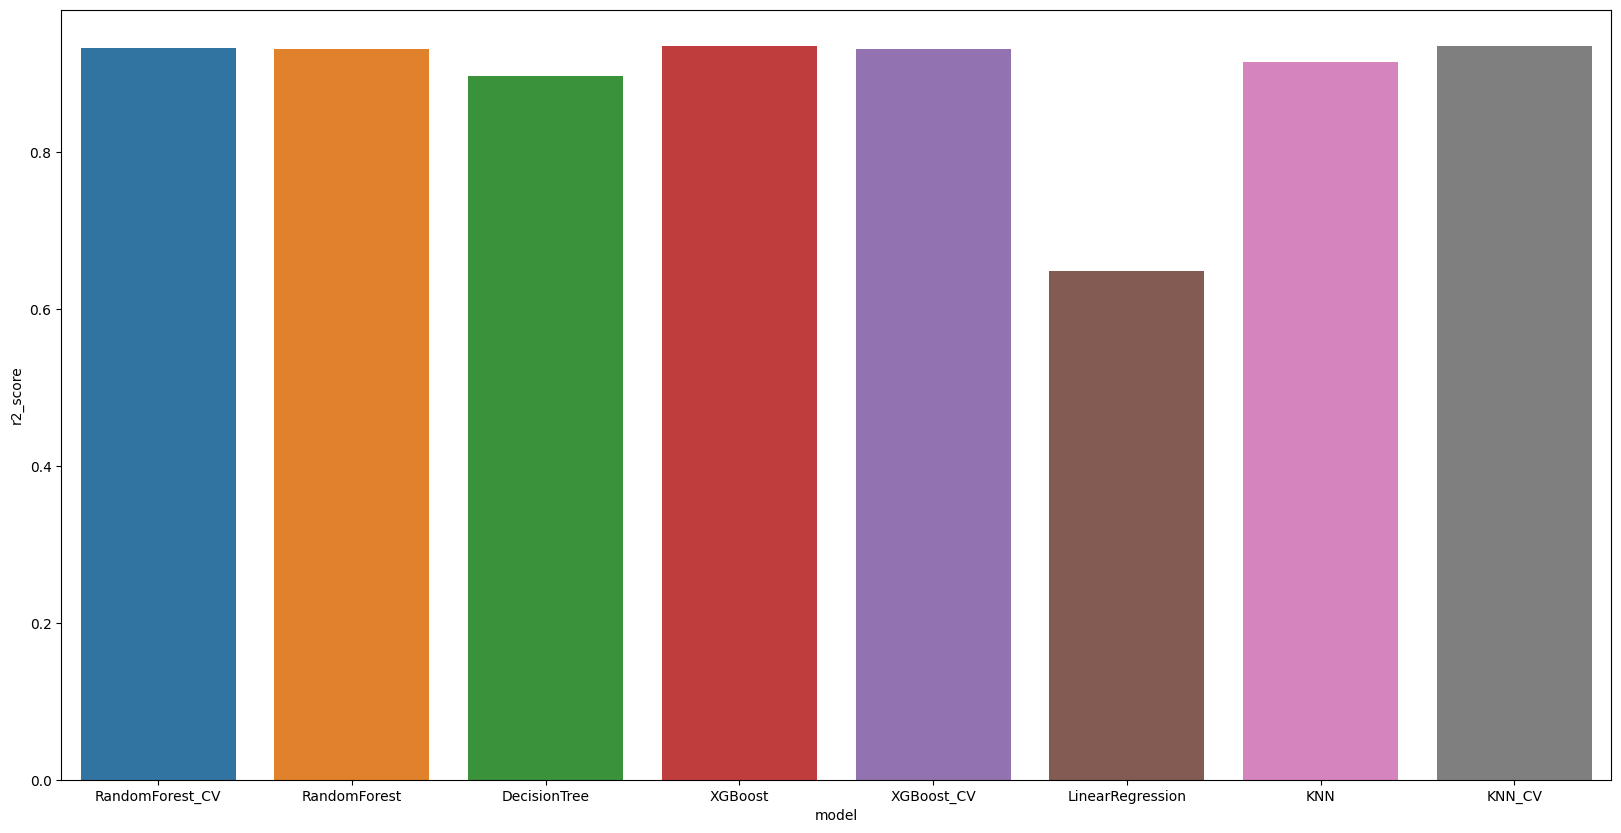

In [190]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='r2_score',data=R2_df)
plt.show()

###### Comparing MAE

###### Mean Absolute Error (MAE): measures the average of the absolute differences between predicted and actual values. A lower MAE value indicates a better fit of the model to the data.

In [191]:
MAE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'mae_scores':[rf_cv_mae,rf_mae,dt_mae,xgb_mae,xgb_cv_mae,lr_mae,knn_mae,knn_cv_mae]}

In [192]:
mae_df=pd.DataFrame(MAE)

In [193]:
mae_df

,model,mae_scores
0,RandomForest_CV,8184.258875
1,RandomForest,8361.727832
2,DecisionTree,10616.735428
3,XGBoost,8874.896722
4,XGBoost_CV,8942.008521
5,LinearRegression,31490.690796
6,KNN,10293.557410
7,KNN_CV,9001.022014


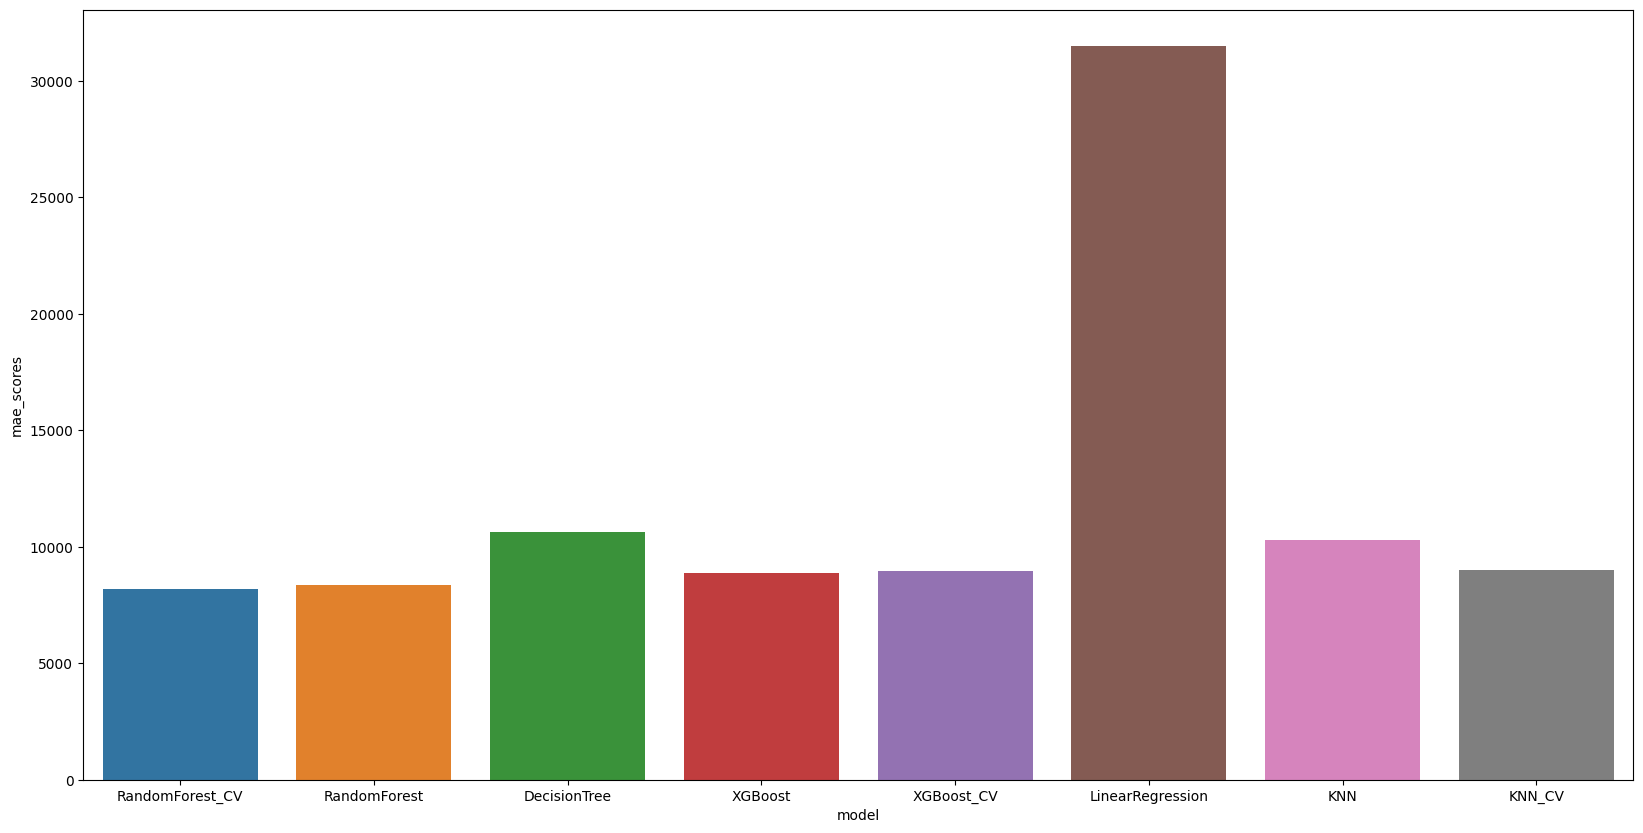

In [194]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='mae_scores',data=mae_df)
plt.show()

###### Comparing MSE

###### Mean Squared Error (MSE): measures the average of the squared differences between predicted and actual values. A lower MSE value indicates a better fit of the model to the data.

In [195]:
MSE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'mse_score':[rf_cv_mse,rf_mse,dt_mse,xgb_mse,xgb_cv_mse,lr_mse,knn_mse,knn_cv_mse]}

In [196]:
mse_df=pd.DataFrame(MSE)

In [197]:
mse_df

,model,mse_score
0,RandomForest_CV,1.016627e+09
1,RandomForest,1.045149e+09
2,DecisionTree,1.556520e+09
3,XGBoost,9.904135e+08
4,XGBoost_CV,1.038129e+09
5,LinearRegression,5.294463e+09
6,KNN,1.301647e+09
7,KNN_CV,9.932163e+08


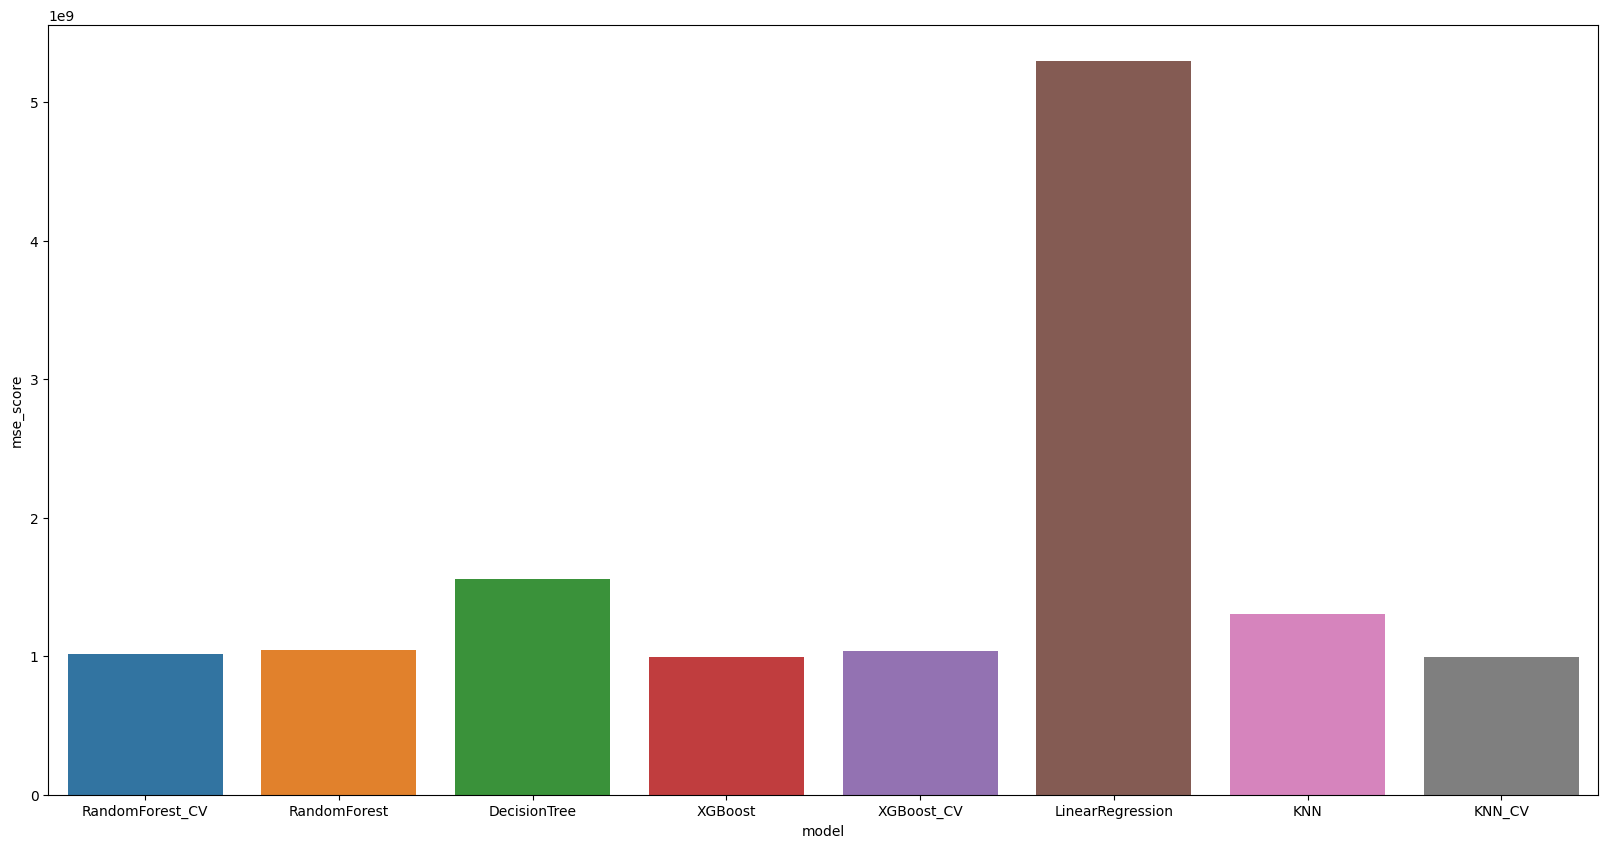

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='mse_score',data=mse_df)
plt.show()

###### Comparing RMSE

###### Root Mean Squared Error (RMSE): is the square root of MSE and measures the standard deviation of the errors made by the model. A lower RMSE value indicates a better fit of the model to the data.

In [199]:
RMSE={'model':['RandomForest_CV','RandomForest','DecisionTree','XGBoost','XGBoost_CV','LinearRegression','KNN','KNN_CV'],'rmse_score':[rf_cv_rmse,rf_rmse,dt_rmse,xgb_rmse,xgb_cv_rmse,lr_rmse,knn_rmse,knn_cv_rmse]}

In [200]:
rmse_df=pd.DataFrame(RMSE)

In [201]:
rmse_df

,model,rmse_score
0,RandomForest_CV,31884.583622
1,RandomForest,32328.765916
2,DecisionTree,39452.753460
3,XGBoost,31470.835841
4,XGBoost_CV,32220.007334
5,LinearRegression,72763.063048
6,KNN,36078.344002
7,KNN_CV,31515.335038


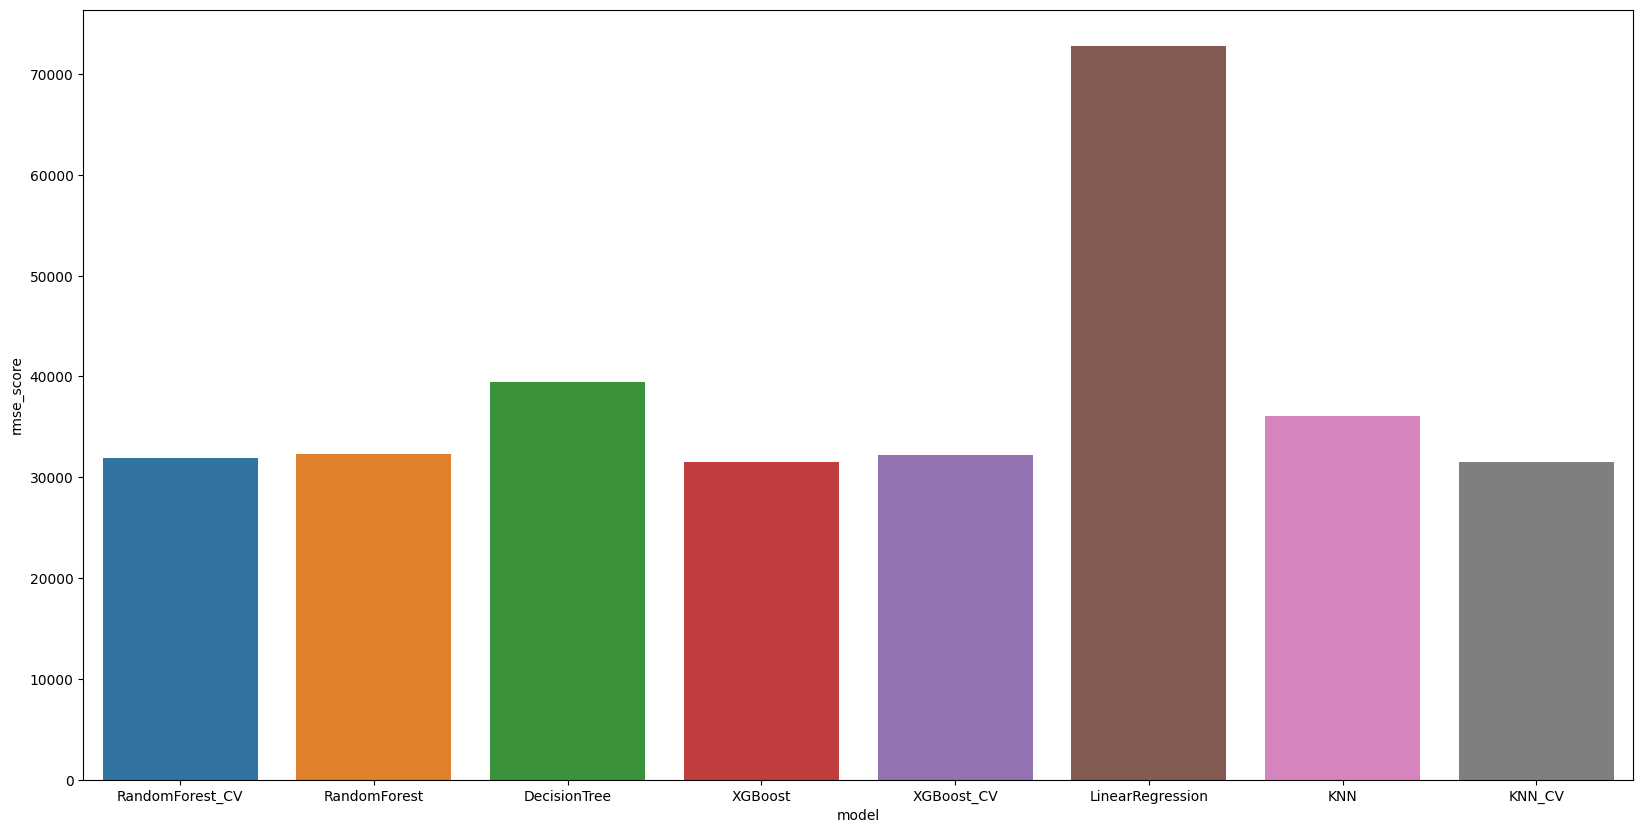

In [202]:
plt.figure(figsize=(20,10))
sns.barplot(x='model',y='rmse_score',data=rmse_df)
plt.show()

# Comparing Predictions Of Models

In [203]:
actual=y_test.to_numpy()


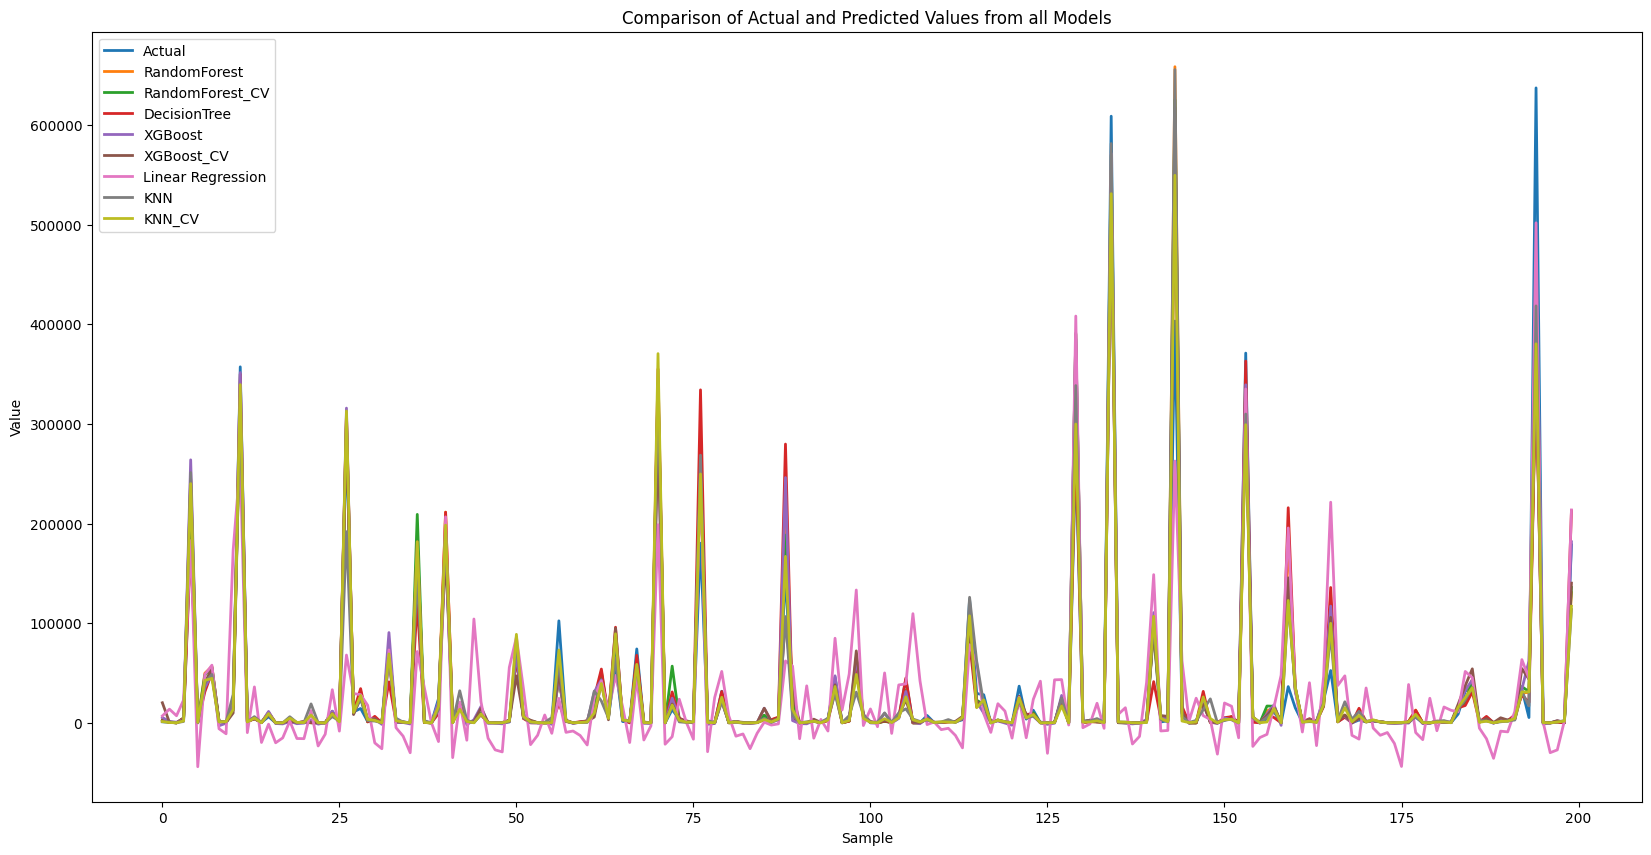

In [204]:
plt.figure(figsize=(20,10))
plt.plot(actual[:200],linewidth=2.0, label='Actual')
plt.plot(y_pred[:200],linewidth=2.0 ,label='RandomForest')
plt.plot(rf_pred[:200],linewidth=2.0, label='RandomForest_CV')
plt.plot(dt_y_pred[:200], linewidth=2.0,label='DecisionTree')
plt.plot(xgb_y_pred[:200], linewidth=2.0,label='XGBoost')
plt.plot(xgb_cv_pred[:200], linewidth=2.0,label='XGBoost_CV')
plt.plot(lr_y_pred[:200], linewidth=2.0,label='Linear Regression')
plt.plot(knn_y_pred[:200], linewidth=2.0,label='KNN')
plt.plot(knn_cv_pred[:200],linewidth=2.0,label='KNN_CV')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values from all Models')
plt.legend(loc='best')
plt.show()